In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Part 1

In [6]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Ass2_Input.csv")
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [13]:
df=df.replace(-200,np.nan)
for i in range(2,15):
 df.iloc[:,i].fillna(int(df.iloc[:,i].mean()), inplace=True)

In [14]:
num_col=df.select_dtypes(include=['float64','int64']).columns
matrix=df[num_col].corr()
RH_corr=matrix['RH'].sort_values(ascending=False)
print(RH_corr)
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.info()

RH               1.000000
NOx(GT)          0.192220
AH               0.167991
PT08.S5(O3)      0.124957
PT08.S1(CO)      0.114607
CO(GT)           0.042027
PT08.S4(NO2)    -0.032188
NMHC(GT)        -0.052745
PT08.S3(NOx)    -0.056738
C6H6(GT)        -0.061675
NO2(GT)         -0.080848
PT08.S2(NMHC)   -0.090379
T               -0.578585
Name: RH, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 1

Number of outliers removed: 20
Z-Score Threshold: 5


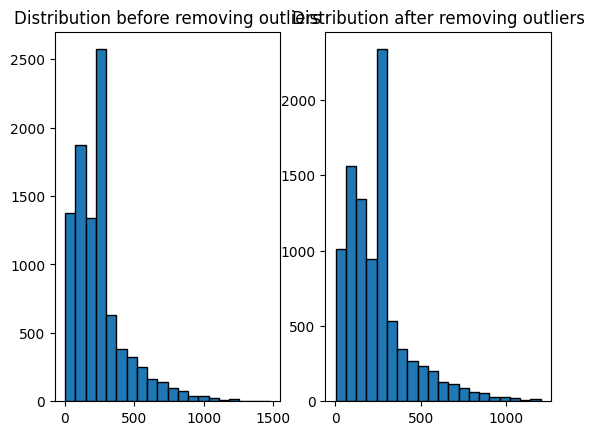

Number of outliers removed: 12
Z-Score Threshold: 5


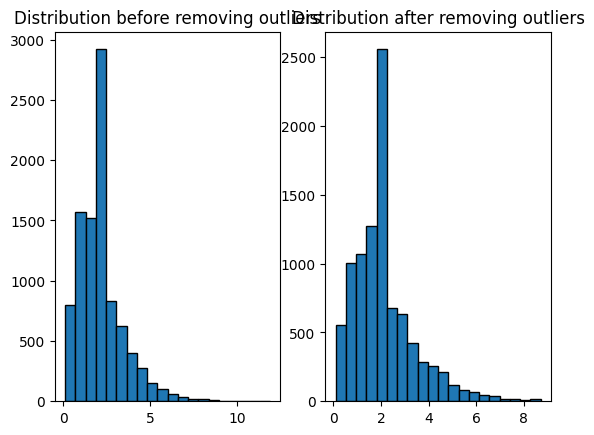

Number of outliers removed: 0
Z-Score Threshold: 5


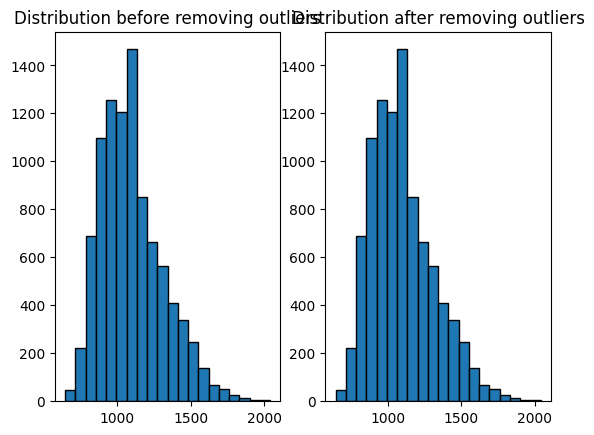

Number of outliers removed: 85
Z-Score Threshold: 5


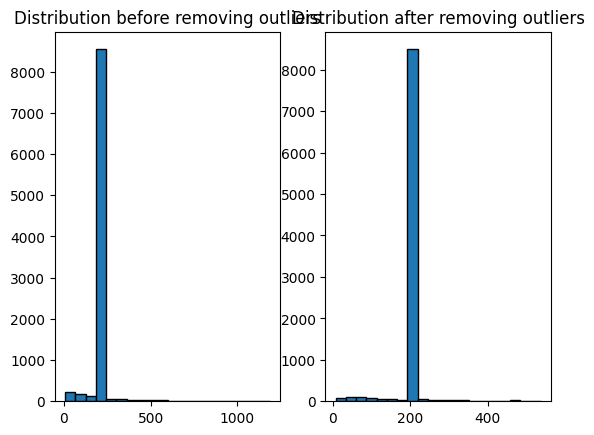

Number of outliers removed: 10
Z-Score Threshold: 5


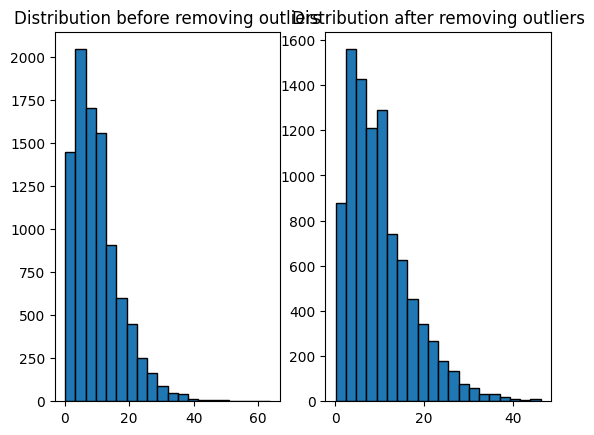

Number of outliers removed: 0
Z-Score Threshold: 5


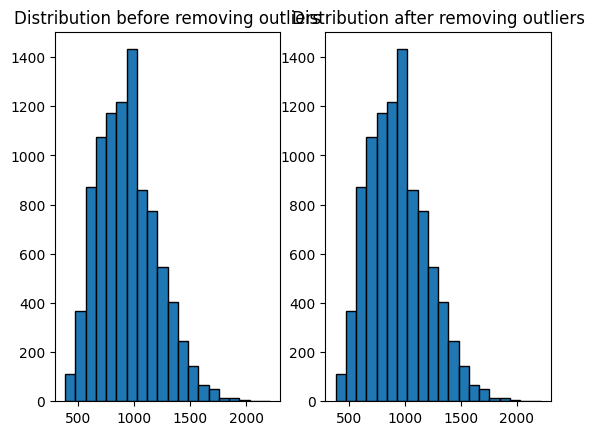

Number of outliers removed: 10
Z-Score Threshold: 5


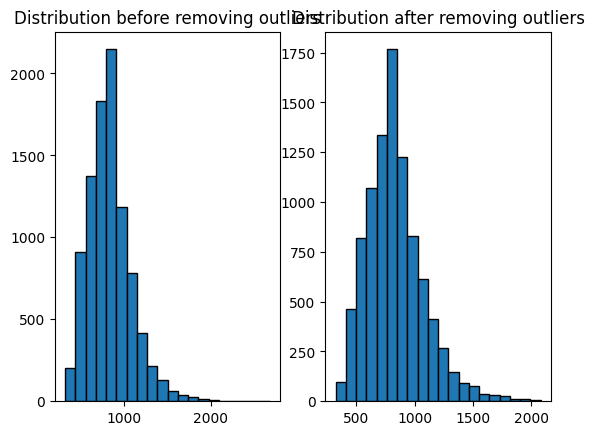

Number of outliers removed: 2
Z-Score Threshold: 5


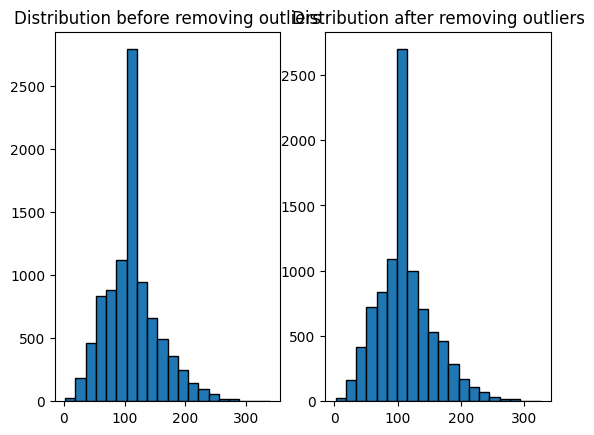

Number of outliers removed: 0
Z-Score Threshold: 5


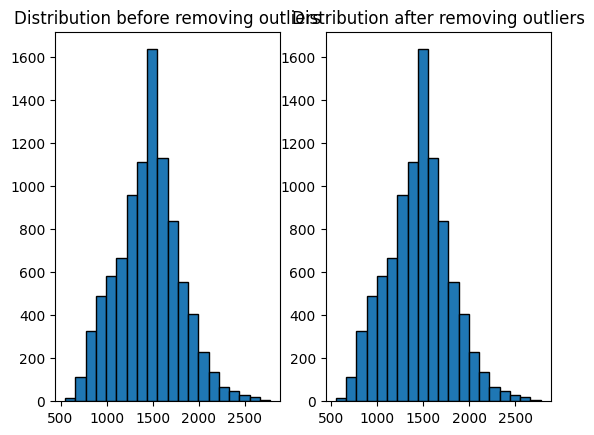

Number of outliers removed: 0
Z-Score Threshold: 5


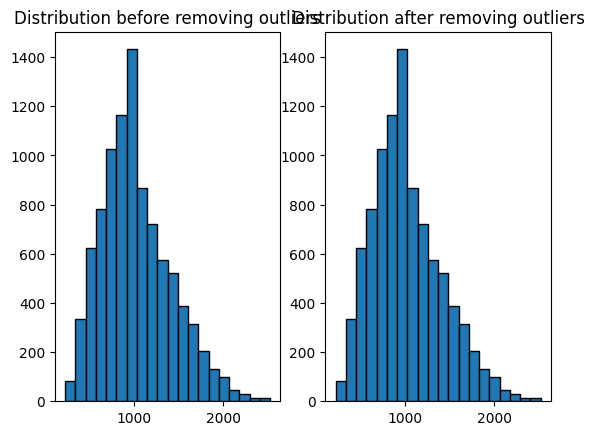

In [18]:
def remove_outliers_zscore(df, feature, z_score_threshold=5):
    # 1. Calculate the mean and standard deviation
    mean_value = df[feature].mean()
    std_dev = df[feature].std()

    # 2. Calculate Z-scores for each data point
    df['z_score'] = (df[feature] - mean_value) / std_dev

    # 3. Identify and remove outliers
    outliers = df[abs(df['z_score']) > z_score_threshold]
    df_no_outliers = df[abs(df['z_score']) <= z_score_threshold]

    # 4. Display information about removed outliers
    print("Number of outliers removed:", len(outliers))
    print("Z-Score Threshold:", z_score_threshold)

    # 5. Optional: Visualize the distribution before and after removing outliers
    

    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.title('Distribution before removing outliers')

    plt.subplot(1, 2, 2)
    plt.hist(df_no_outliers[feature], bins=20, edgecolor='black')
    plt.title('Distribution after removing outliers')

    plt.show()

    # 6. Return the DataFrame without outliers
    return df_no_outliers.drop(columns=['z_score'])

# Example usage:
# Replace 'YourFeatureColumnName' with the actual name of the column containing outliers
df_no_outliers = remove_outliers_zscore(df, 'NOx(GT)')
df_no_outliers = remove_outliers_zscore(df, 'CO(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S1(CO)')
df_no_outliers = remove_outliers_zscore(df, 'NMHC(GT)')
df_no_outliers = remove_outliers_zscore(df, 'C6H6(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S2(NMHC)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S3(NOx)')
df_no_outliers = remove_outliers_zscore(df, 'NO2(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S4(NO2)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S5(O3)')

### Part 2

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X=df.drop(columns='RH')
Y=df['RH']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)


(7953, 13)
(1404, 13)


### Part 3

In [20]:
def cost(y_hat, y_train):
    l = (y_hat - y_train) ** 2
    cost = l.mean()
    return cost

In [21]:
W = np.zeros(X_train.shape[1])

def gradient_descent(X_train, y_train, W, learning_rate, num_epochs):
    L=[]
    for _ in range(num_epochs):
        y_hat = np.dot(X_train, W)
        errors = y_hat - y_train
        gradient = np.dot(X_train.T, errors) / len(y_train)
        W -= learning_rate * gradient
        L.append(cost(y_hat, y_train))

    return W,L

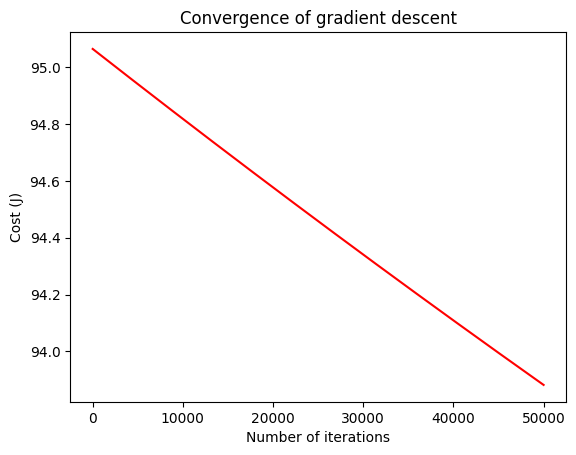

In [55]:
# Hyperparameters
learning_rate = 0.0000003
num_epochs = 50000

#Calling Gradient descent
W,L = gradient_descent(X_train, y_train, W, learning_rate, num_epochs)

#Plotting Cost v/s Iterations
plt.plot(range(1, num_epochs + 1), L, color='r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

y_hat_t= np.dot(X_test, W)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Part 4

Mean Squared Error on Test Set: 120.19012740582119
R2 Score: 0.5856815445295277


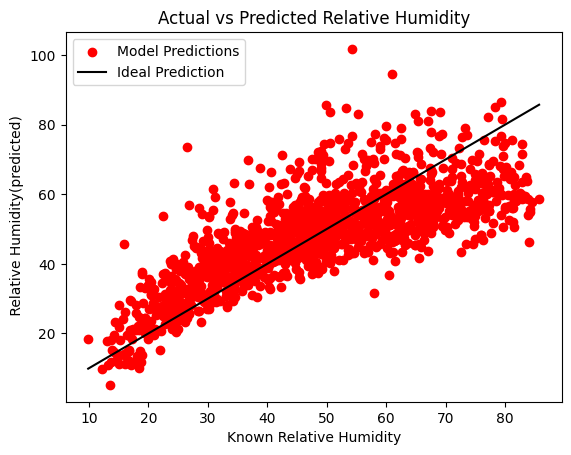

In [42]:
# Evaluating the model
mse1 = mean_squared_error(y_test, y_hat_t)
print("Mean Squared Error on Test Set:", mse1)
r2_1 = r2_score(y_test,y_hat_t)
print("R2 Score:", r2_1)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_hat_t,color='r', label="Model Predictions")
plt.xlabel("Known Relative Humidity")
plt.ylabel(" Relative Humidity(predicted)")
plt.title("Actual vs Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='black',  label='Ideal Prediction')
plt.legend()
plt.show()


#### By Sklearn

Mean Squared Error on Test Set: 35.29557002654738
R2 Score: 0.8783293904916791


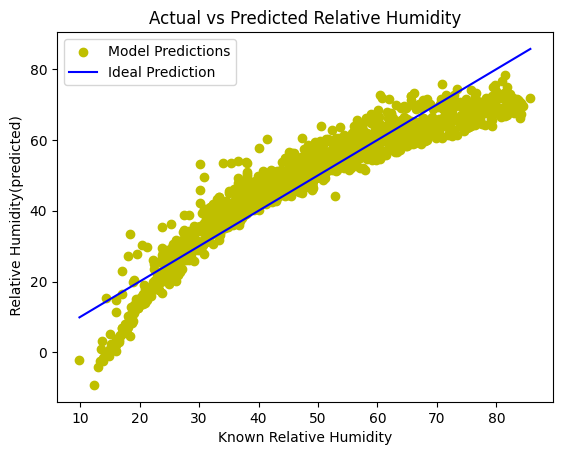

In [46]:
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse2)
r2_2 = r2_score(y_test,y_pred)
print("R2 Score:", r2_2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='y', label="Model Predictions")
plt.title("Actual vs Predicted Relative Humidity")
plt.xlabel("Known Relative Humidity")
plt.ylabel(" Relative Humidity(predicted)")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='b',  label='Ideal Prediction')
plt.legend()
plt.show()

### On Single Plot

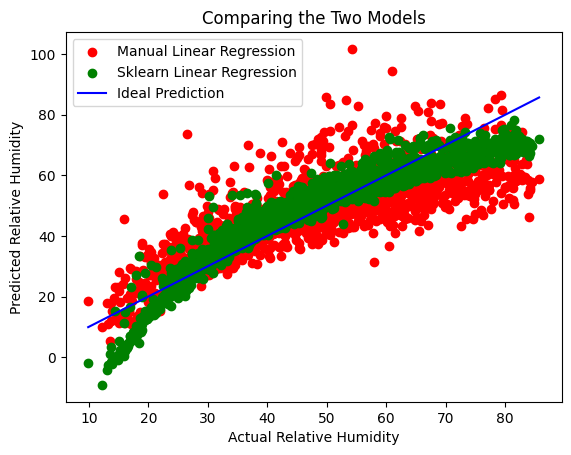

In [38]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_hat_t,color='r', label='Manual Linear Regression')
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.title("Comparing the Two Models")
plt.legend()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='g',label='Sklearn Linear Regression')
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='b',  label='Ideal Prediction')
plt.legend()
plt.show()